# Falied 2D equalization analysis

### 3x3 Lieb

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


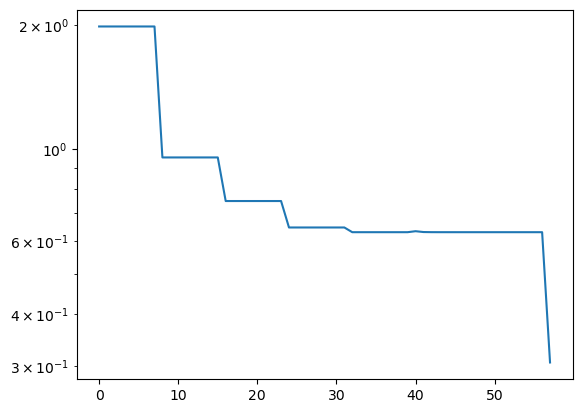

In [32]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1520, 1690),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")

import matplotlib.pyplot as plt

plt.plot(c, '-')
plt.yscale('log')

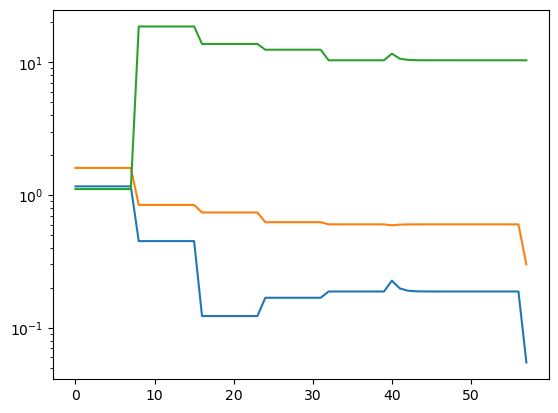

In [19]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')

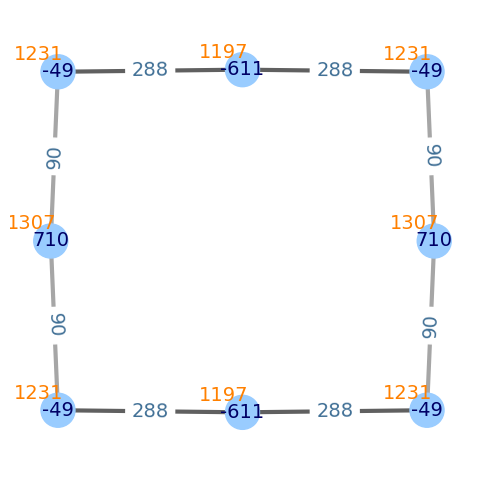

In [20]:
G.draw_graph()

In [21]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=-1)
E, W, p = G.eigen_basis()
G.verbosity = 0
# G.singleband_Hubbard(u=True, offset=True)
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
print('detV =', la.det(V))


Equalize: -1-th equalization trap depths: [1.07538486 1.04306065 1.08629   ]
Equalize: -1-th equalization trap centers:
[[-1.04495048 -0.99641706]
 [-1.01539644  0.        ]
 [ 0.         -0.94482144]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 31 20] is set.
DVR: R0=[4.52 4.69 7.2 ]w is set.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.70s.
H_solver: eigenstates memory usage:  1.27 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 31 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.63

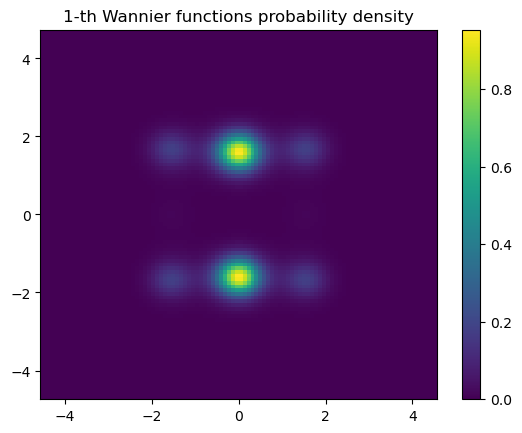

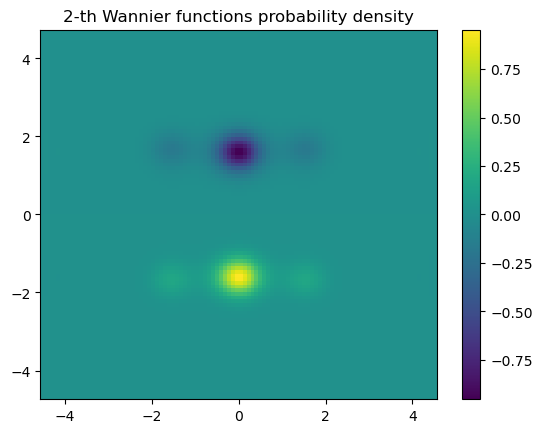

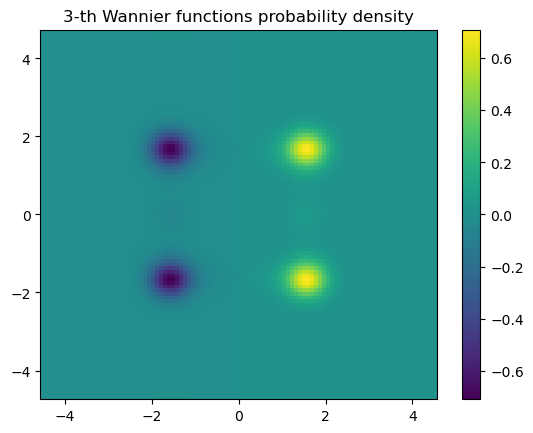

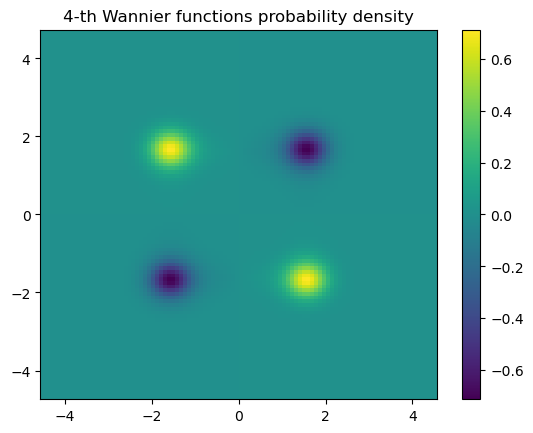

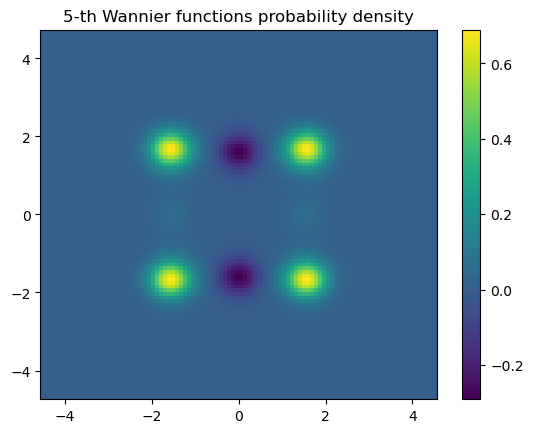

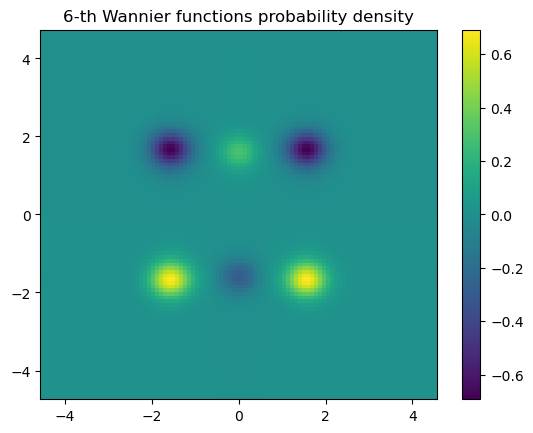

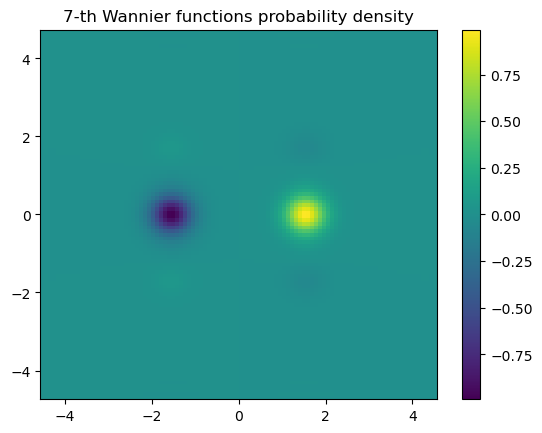

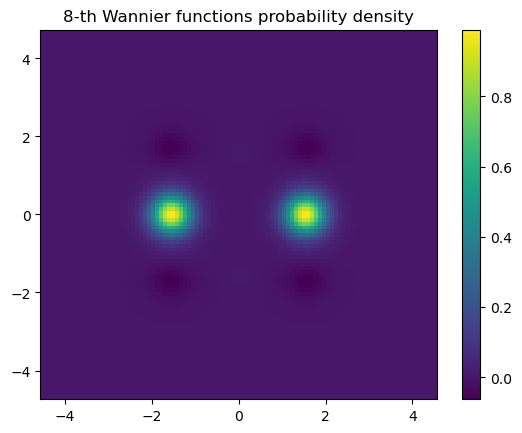

In [24]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


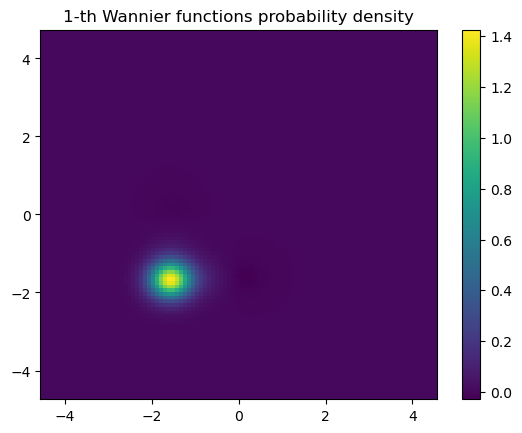

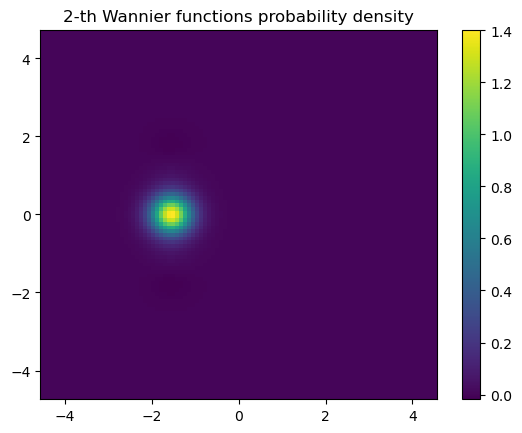

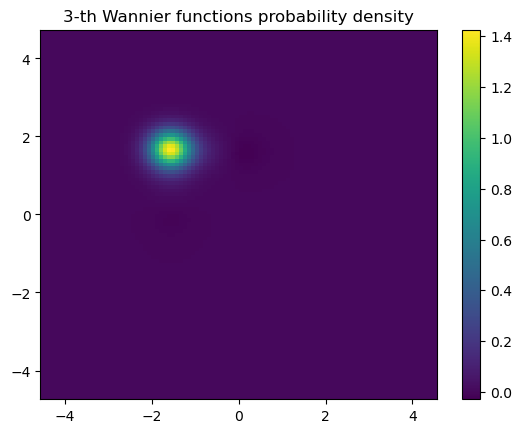

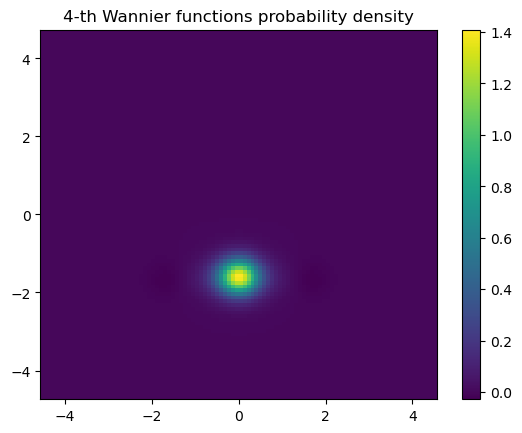

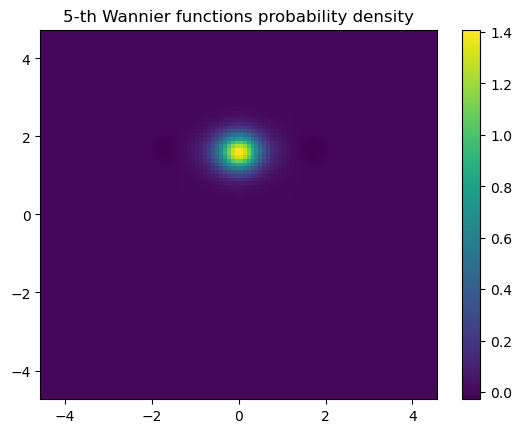

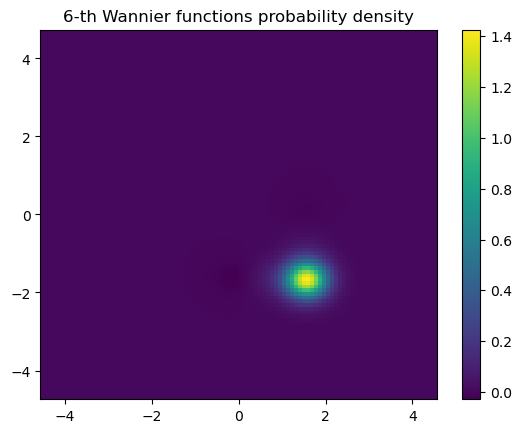

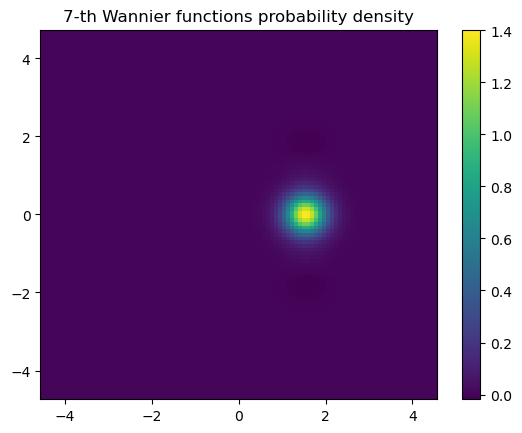

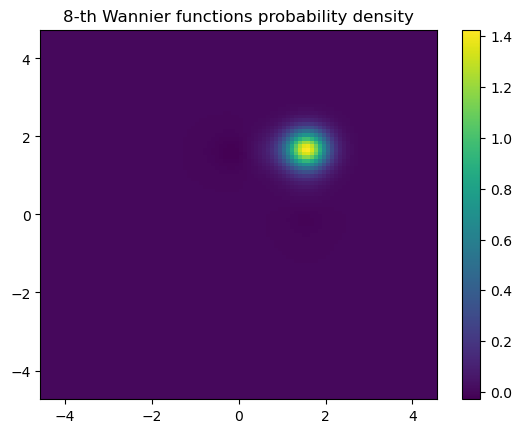

In [23]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')
